In [6]:
# 1. Split dataset into training (80%) and testing (20%) sets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load selected features dataset
df = pd.read_csv("../data/heart_disease_selected_features.csv")
X = df.drop('num', axis=1)
y = df['num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (237, 11)
Testing set: (60, 11)


In [7]:
# 2. Train classification models
# Convert to binary classification (0 = no disease, 1+ = disease)
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train_binary)
    trained_models[name] = model
    print(f"{name} trained")

Logistic Regression trained
Decision Tree trained
Random Forest trained
SVM trained


In [8]:
# 3. Evaluate models using Accuracy, Precision, Recall, F1-score
results = {}

for name, model in trained_models.items():
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred)
    recall = recall_score(y_test_binary, y_pred)
    f1 = f1_score(y_test_binary, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }

# Display results
print("Model Performance Metrics:")
print("-" * 50)
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall:    {metrics['Recall']:.4f}")
    print(f"  F1-Score:  {metrics['F1-Score']:.4f}")
    print()

Model Performance Metrics:
--------------------------------------------------
Logistic Regression:
  Accuracy:  0.9167
  Precision: 0.9130
  Recall:    0.8750
  F1-Score:  0.8936

Decision Tree:
  Accuracy:  0.8000
  Precision: 0.7143
  Recall:    0.8333
  F1-Score:  0.7692

Random Forest:
  Accuracy:  0.8667
  Precision: 0.8077
  Recall:    0.8750
  F1-Score:  0.8400

SVM:
  Accuracy:  0.8833
  Precision: 0.8696
  Recall:    0.8333
  F1-Score:  0.8511



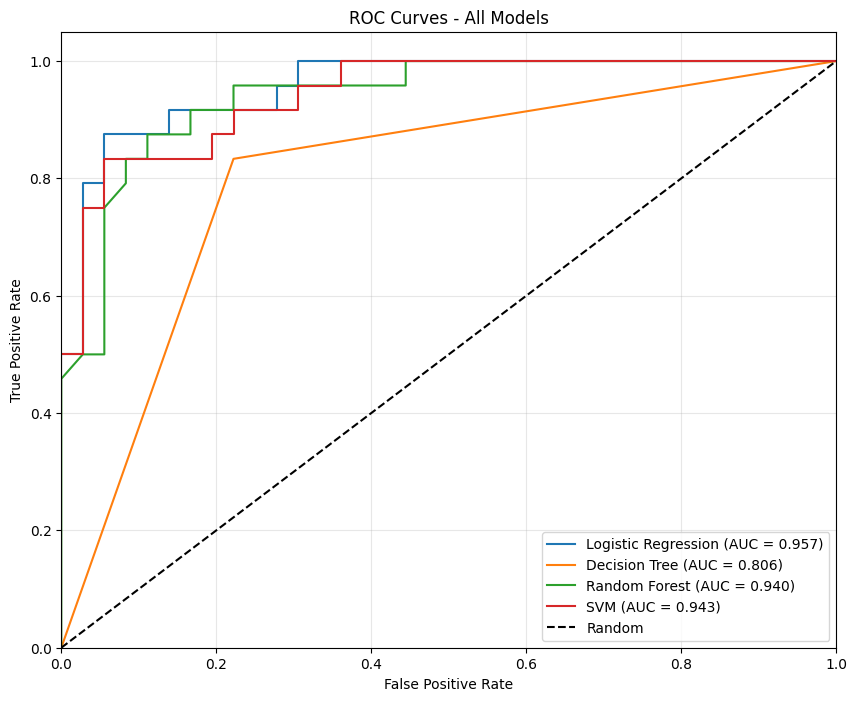

In [9]:
# ROC Curve & AUC Score
plt.figure(figsize=(10, 8))

for name, metrics in results.items():
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_binary, metrics['Probabilities'])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()